# **AI-Driven Public Transport Image Classification for Road Safety and Efficiency**

**BUSINESS UNDERSTANDING**

**Introduction : The State of Kenya’s Public Transport**

Kenya’s public transport system is essential for millions of daily commuters, with Matatus, Buses, TukTuks, and BodaBodas forming the backbone of urban and rural mobility. Despite its importance, the sector is plagued by road safety concerns, traffic congestion, and a lack of regulatory enforcement. Reckless driving, overloaded vehicles, and poor maintenance contribute to high accident rates, while unoptimized PSV routes exacerbate urban congestion, particularly in Nairobi CBD.

**The Need for an AI-Based Solution**

Current transport challenges demand an intelligent and automated approach to classify, track, and regulate PSVs in real time. Manual enforcement methods are inefficient, making it difficult for authorities to ensure compliance with road safety regulations.By leveraging AI-powered classification and object detection models, the transport sector can move towards a more structured and efficient system, ensuring safer roads, reduced congestion, and optimized route planning.

**What is Beba Beba AI?**

Beba Beba AI is an AI-powered transport monitoring system designed to enhance road safety, traffic efficiency, and regulatory compliance by leveraging deep learning image classification and object detection techniques.

The system will classify PSVs into Matatus, Buses, TukTuks, and BodaBodas, detect unsafe or overloaded vehicles, and provide real-time PSV tracking to optimize urban mobility. By addressing challenges such as reckless driving, congestion, and optimizing PSV route planning, Beba Beba AI will support traffic authorities,and transport operators with actionable insights.

**Key Stakeholders in Beba Beba AI**

Government Institutions → Ministry of Roads & Transport, NTSA, KENHA (for traffic regulation & transport planning) and county governments.

International Organizations → Entities like IRU and other organizations focused on transportation systems.

Matatu Saccos & Ride-Hailing Services → Companies like Uber, Bolt, and Matatu Saccos benefit from improved fleet operations.

Vehicle Manufacturers → Companies like Toyota, Nissan, and Tata gain valuable market insights for PSV safety & performance.

Research Institutions & Universities → Academic organizations conducting AI and computer vision research.

AI Startups → Innovators working on intelligent transport & road safety solutions.

## **Project Objectives – Beba Beba AI**

**Primary Objective**

***Enhancing Road Safety with Automated PSV Classification***

Develop and deploy an AI-powered classification system to identify and categorize Public Service Vehicles (PSVs), including matatus, buses, boda-bodas, and tuk-tuks. The system will assist law enforcement and regulatory agencies in detecting non-compliant vehicles (e.g., overloaded, unroadworthy, excessively modified), helping to reduce road accidents and improve transport safety.

*Modeling Strategy:*

Deep Learning Approach → Use Convolutional Neural Networks (CNNs) to classify PSVs and detect non-compliance features such as damaged vehicles, missing regulatory markings, and illegal modifications.
Object Detection → Use YOLOv8 or Faster R-CNN to identify overloaded or unsafe PSVs from images or video feeds.

**Secondary Objective**

***Real-Time Traffic Monitoring & Route Optimization***

Implement a real-time PSV tracking system to monitor vehicle movements, providing actionable insights for traffic flow optimization and congestion reduction. This system will aid in urban planning and transport regulation by analyzing PSV density and movement patterns, particularly in high-traffic areas like Nairobi CBD.

*Modeling Strategy:*

Object Detection for Real-Time Tracking → Deploy YOLOv8, Faster R-CNN, or SSD on street cameras to detect and track PSV movements.
PSV Count Tracker → Monitor how many PSVs operate in key areas within a set time frame, allowing transport authorities to make data-driven decisions.

***Improving Fleet Management & Operational Efficiency***

Automate PSV classification and tracking to support transport operators, fleet managers, and insurance providers in monitoring vehicle conditions, optimizing maintenance schedules, and ensuring compliance with regulations. This system will help reduce operational costs and improve efficiency in the transport sector.

*Modeling Strategy:*

Deep Learning for Fleet Monitoring → Use CNN-based classification models to analyze PSV images and detect wear, damage, or anomalies that could indicate maintenance issues.
Anomaly Detection → Identify irregular patterns in vehicle usage, enabling predictive maintenance and reducing downtime.

**Data Processing and Infrastructure**

The project will utilize Google Colab for cloud-based training, OpenCV for video processing, and TensorFlow/Keras for deep learning implementation. The image dataset will undergo extensive preprocessing, ensuring high-quality data for model training.

**Model Performance Metrics**

*Classification Accuracy* (≥ 85%) → Measures the correctness of PSV type predictions.

*F1-Score* (≥ 80%) → Balances precision and recall to evaluate classification reliability.

*Mean Average Precision* (mAP ≥ 80%) → Measures object detection accuracy for real-time monitoring.

*False Positive & False Negative Rate* → Ensures misclassification is minimized.





**Future Integration and Impact**

Beyond its initial implementation, Beba Beba AI can be expanded to integrate with government agencies for policy enforcement. The model can also be adapted to process live traffic camera feeds, providing real-time insights for city planners, PSV saccos and law enforcement. Ultimately, Beba Beba AI aims to make Kenyan roads safer, improve transport efficiency, and modernize PSV regulation through AI-driven solutions.

## **1. DATA UNDERSTANDING**



**Dataset Overview**

Public Service Vehicle Categories: Matatus, Buses (e.g Minibuses, electric buses, huge buses), Boda-Bodas, Tuk-Tuks

Additionally under Buses we also gathered images of various PSV Saccos e.g Super Metro, KBS, City Hopper etc.


**Data Sources:**

Google Images → Collected using web scraping tools (e.g., Fatkun Extension).
Public Datasets → Sources like Google Open Images and OpenStreetMap.
Alternative Data Collection: If direct access to sources is not feasible, manual data collection and labeling was done.



**1.1 Import necessary libraries and load images data**

In [1]:
#importing necessary libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image
from sklearn.model_selection import train_test_split
# Augment the Training Data:
import albumentations as A
#from albumentations.pytorch import ToTensorV2
from sklearn.preprocessing import LabelEncoder
#from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from PIL import Image
import numpy as np

In [2]:
#Mounting Google Drive to access data stored in the folders within the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define the dataset directory (same as Jupyter Notebook directory)
dataset_path = "/content/drive/MyDrive/Capstone_Project_Group1/images_cleaned_batch_3"


# Check if the dataset is accessible
print("Dataset contents:", os.listdir(dataset_path))

Dataset contents: ['tuktuk', 'matatu', 'bodaboda', 'buses']


**1.2 Review of uploaded image dataset**

As shown above we have now loaded the data.
Below we will now look at the following:
1. Total number of images per category in the data
2. Preliminary image validity check
3. Renaming images with a consistent naming structure as images had various names indicative of source of extraction.
4. Converting the data set to a data frame for easy viewing of the images for each category
5. Checking the count and distribution of images



***Total number of images per category in the data***


In [4]:
# Define paths for each category
tuktuk_path = os.path.join(dataset_path, "tuktuk")
matatu_path = os.path.join(dataset_path, "matatu")
bus_path = os.path.join(dataset_path, "buses")
boda_path = os.path.join(dataset_path, "bodaboda")

# Verify files in each category
print("TukTuk Images:", len(os.listdir(tuktuk_path)))
print("Matatu Images:", len(os.listdir(matatu_path)))
print("Bus Images:", len(os.listdir(bus_path)))
print("BodaBoda Images:", len(os.listdir(boda_path)))

TukTuk Images: 199
Matatu Images: 197
Bus Images: 195
BodaBoda Images: 195


# Data Cleaning
## How did we achieve this?

We gathered and reviewed our dataset to ensure high-quality images. We removed:

- **Low-quality images** through manual inspection.
- **Duplicate images** using **Norton Duplicate File Finder**.
- **Irrelevant images** that do not meet the dataset criteria.


### Step 2: Define Image Quality Criteria 📸

After filtering out duplicates, we focused on **removing low-quality images** to ensure our dataset is as clean and useful as possible:

To determine the quality of each image, we applied the following criteria:

- **✅ Resolution**: Images should be sharp and clear, avoiding pixelation or blurriness. (No fuzzy details!)
- **✅ Lighting & Contrast**: Images should not be overly dark or too bright, ensuring the vehicles are clearly visible. (Perfect exposure is key!)
- **✅ Angles & Perspective**: Ensure proper views of the vehicle (front, side, or rear). Avoid extreme angles that could complicate classification. (Capture all sides!)
- **✅ Obstructions & Background Noise**: No significant objects blocking the vehicle or distracting background elements. (Clear focus on the vehicle!)
- **✅ Completeness**: The full vehicle should be visible—partial images may cause confusion during training. (No cropped vehicles!)

---

####  Images to Remove:
We removed images that are:

- **❌** **Blurry**, **pixelated**, or **distorted**.
- **❌** **Overexposed** or **underexposed**.
- **❌** Contain **excessive distractions** in the background.
- **❌** Are **duplicates** or **near-identical** images.

---

### Final Validation ✔️

- **Random Sampling Check**: A check for invalid images they meet the quality requirements.


**Preliminary image validity check**

 - Checking if the images are in the approriate formart and identify any corrupted images

In [5]:
# Function to check for corrupted images in the Images Data folder (specifically files not in the correct format)



def check_image_validity(dataset_path, valid_extensions=('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
    """Checks for valid image files in a directory and its subdirectories.

    Args:
        dataset_path: The path to the root directory of your image dataset in Google Drive.
        valid_extensions: A tuple of valid image file extensions (case-insensitive).

    Returns:
        A dictionary where keys are category names (folder names) and values are lists of invalid image file paths within that category.  Also prints summary information.
    """

    invalid_images = {}
    total_images = 0
    corrupted_count = 0

    for root, _, files in os.walk(dataset_path):  # Walk through subdirectories
        category = os.path.basename(root)  # Get the category name (folder name)
        invalid_images[category] = []  # Initialize list for this category

        for filename in files:
            if filename.lower().endswith(valid_extensions): # Case-insensitive check
                filepath = os.path.join(root, filename)
                total_images += 1
                try:
                    img = Image.open(filepath)  # Or img = cv2.imread(filepath) for OpenCV
                    img.verify()  # Verify image integrity
                    img.close()
                except (IOError, SyntaxError) as e:  # Catch potential errors
                    print(f"Invalid image: {filepath} - {e}")
                    invalid_images[category].append(filepath)
                    corrupted_count += 1
            elif not filename.lower().endswith(valid_extensions):
                filepath = os.path.join(root, filename)
                print(f"Invalid file extension: {filepath}")
                invalid_images[category].append(filepath)


    print("\n--- Summary ---")
    print(f"Total images checked: {total_images}")
    print(f"Corrupted images found: {corrupted_count}")

    for category, invalid_files in invalid_images.items():
        if invalid_files:
            print(f"\nInvalid files in category '{category}':")
            for file in invalid_files:
                print(f"  - {file}")
        else:
            print(f"\nNo invalid files found in category '{category}'")

    return invalid_images


In [6]:
# Check for invalid data types in our Image Dataset

invalid_images = check_image_validity(dataset_path)


--- Summary ---
Total images checked: 786
Corrupted images found: 0

No invalid files found in category 'images_cleaned_batch_3'

No invalid files found in category 'tuktuk'

No invalid files found in category 'matatu'

No invalid files found in category 'bodaboda'

No invalid files found in category 'buses'


### Step 4: Renaming Images 📝

As part of the data cleaning process, we standardized the naming of the images in our dataset. Each image was renamed using a structured format:

- **Format**: `category_index.jpg` (e.g., `tuktuk_001.jpg`)
- **Reason**: This helps in easily identifying the category and ordering of images in the dataset.

By iterating through each category, we renamed all the images for consistency and ease of use during model training.


In [7]:
# Define dataset categories
categories =['matatu', 'buses', 'tuktuk', 'bodaboda']

# Loop through each category folder and rename images
for category in categories:
    folder_path = os.path.join(dataset_path, category)
    image_files = sorted([f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png','.gif', '.bmp'))])

    for index, filename in enumerate(image_files):
        new_name = f"{category.lower()}_{index+1:03d}.jpg"  # e.g., tuktuk_001.jpg
        old_path = os.path.join(folder_path, filename)
        new_path = os.path.join(folder_path, new_name)

        os.rename(old_path, new_path)
        print(f"Renamed {filename} → {new_name}")

print("✅ Renaming complete for all categories!")

Renamed matatu_001.jpg → matatu_001.jpg
Renamed matatu_002.jpg → matatu_002.jpg
Renamed matatu_003.jpg → matatu_003.jpg
Renamed matatu_004.jpg → matatu_004.jpg
Renamed matatu_005.jpg → matatu_005.jpg
Renamed matatu_006.jpg → matatu_006.jpg
Renamed matatu_007.jpg → matatu_007.jpg
Renamed matatu_008.jpg → matatu_008.jpg
Renamed matatu_009.jpg → matatu_009.jpg
Renamed matatu_010.jpg → matatu_010.jpg
Renamed matatu_011.jpg → matatu_011.jpg
Renamed matatu_012.jpg → matatu_012.jpg
Renamed matatu_013.jpg → matatu_013.jpg
Renamed matatu_014.jpg → matatu_014.jpg
Renamed matatu_015.jpg → matatu_015.jpg
Renamed matatu_016.jpg → matatu_016.jpg
Renamed matatu_017.jpg → matatu_017.jpg
Renamed matatu_018.jpg → matatu_018.jpg
Renamed matatu_019.jpg → matatu_019.jpg
Renamed matatu_020.jpg → matatu_020.jpg
Renamed matatu_021.jpg → matatu_021.jpg
Renamed matatu_022.jpg → matatu_022.jpg
Renamed matatu_023.jpg → matatu_023.jpg
Renamed matatu_024.jpg → matatu_024.jpg
Renamed matatu_025.jpg → matatu_025.jpg


## Data Preprocessing

In this step, we load the images from our dataset, process them, and prepare them for further use in model training.

### What did we do?
1. **Define Categories**: We read the category names (folders) from the dataset directory.
2. **Store Image Data**: For each category, we:
   - Load each image from the category folder.
   - Convert the image to RGB format for consistency (as OpenCV loads images in BGR format by default).
   - Resize the image to a uniform size of **224x224 pixels** (this is commonly used for neural networks like CNNs).
4. **Store in Arrays**: We store all the image data and their corresponding labels (category) in lists.
5. **Create DataFrame**: Finally, we create a **Pandas DataFrame** for easy exploration and analysis of the dataset.

Check for the loaded dataset to see if its loaded successfully.


✅ Dataset loaded successfully!
                                               Image Category
0  [[[113, 163, 212], [116, 166, 216], [121, 171,...   tuktuk
1  [[[117, 162, 185], [92, 136, 159], [103, 145, ...   tuktuk
2  [[[212, 220, 222], [212, 220, 222], [213, 220,...   tuktuk
3  [[[235, 225, 216], [248, 238, 229], [254, 249,...   tuktuk
4  [[[178, 190, 190], [179, 191, 191], [179, 193,...   tuktuk


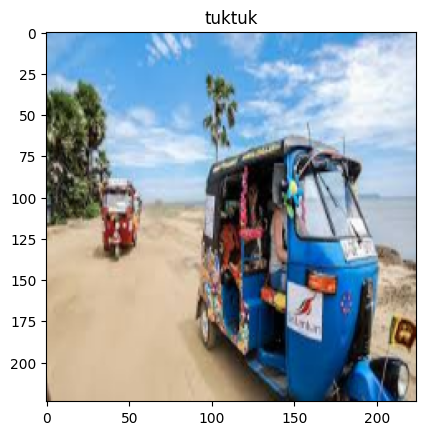

In [8]:


# Define categories
categories = os.listdir(dataset_path)

# Store image data
data = []
labels = []

# Load images from each category folder
for category in categories:
    folder_path = os.path.join(dataset_path, category)

    if os.path.isdir(folder_path):  # Check if it's a folder
        for file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file)

            try:
                # Load image using OpenCV (BGR format)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

                # Resize image to (224x224) for consistency
                img = cv2.resize(img, (224, 224))

                # Append to lists
                data.append(img)
                labels.append(category)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

# Convert to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Create a DataFrame for easy exploration
df = pd.DataFrame({"Image": list(data), "Category": labels})

print("✅ Dataset loaded successfully!")
print(df.head())  # Show first few rows

# Display an example image
plt.imshow(data[0])  # Show first image
plt.title(labels[0])  # Show category
plt.show()


**Expanding the view of our data to check randomly the first 5 images for each category**

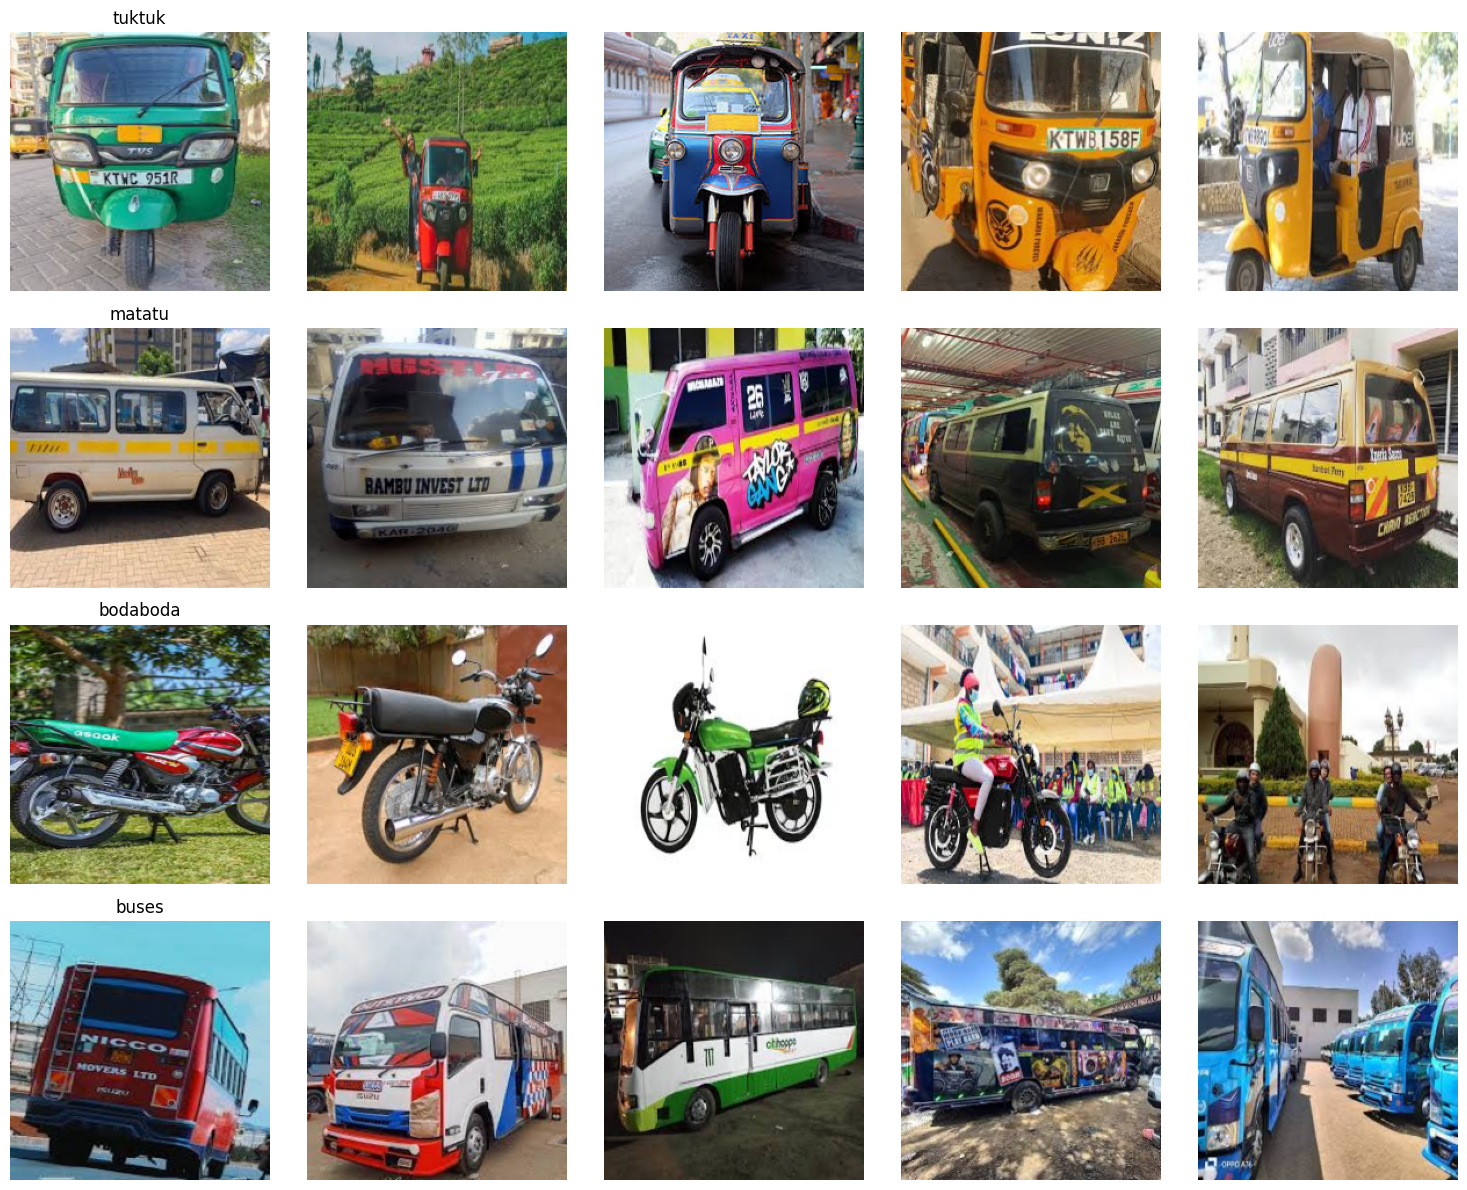

In [9]:


def display_images(df, num_images=5):
    categories = df["Category"].unique()  # Get unique categories from the DataFrame
    num_categories = len(categories)

    fig, axes = plt.subplots(num_categories, num_images, figsize=(15, 3 * num_categories))  # Adjust figure size dynamically

    for i, category in enumerate(categories):
        category_df = df[df["Category"] == category]

        if category_df.empty:  # Check if DataFrame is empty for this category
            print(f"No images found for category: {category}")
            continue  # Skip to the next category

        n_images_to_display = min(num_images, len(category_df)) # Ensure that it does not attempt to display more images than available for the category.
        category_images = category_df.sample(n_images_to_display)["Image"].values

        for j, img in enumerate(category_images):
            try:  # Handle potential issues with image display
                if num_categories == 1: # If only one category, axes is not an array, so we need to handle it differently
                    axes[j].imshow(img)
                    axes[j].axis("off")
                    if j == 0:
                        axes[j].set_title(category, fontsize=12)
                else: # If more than 1 category
                    axes[i, j].imshow(img)
                    axes[i, j].axis("off")
                    if j == 0:
                        axes[i, j].set_title(category, fontsize=12)
            except Exception as e:
                print(f"Error displaying image for {category}: {e}")

    plt.tight_layout()
    plt.show()

# Example usage (assuming you have a DataFrame 'df' with 'Category' and 'Image' columns):
display_images(df)

**Checking image count and distribution per category**

In [10]:
df["Category"].value_counts()

Category
tuktuk      199
matatu      197
bodaboda    195
buses       195
Name: count, dtype: int64

##  Visualizing The Category Colum

<ipython-input-10-74d98f8fa79c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.catplot(


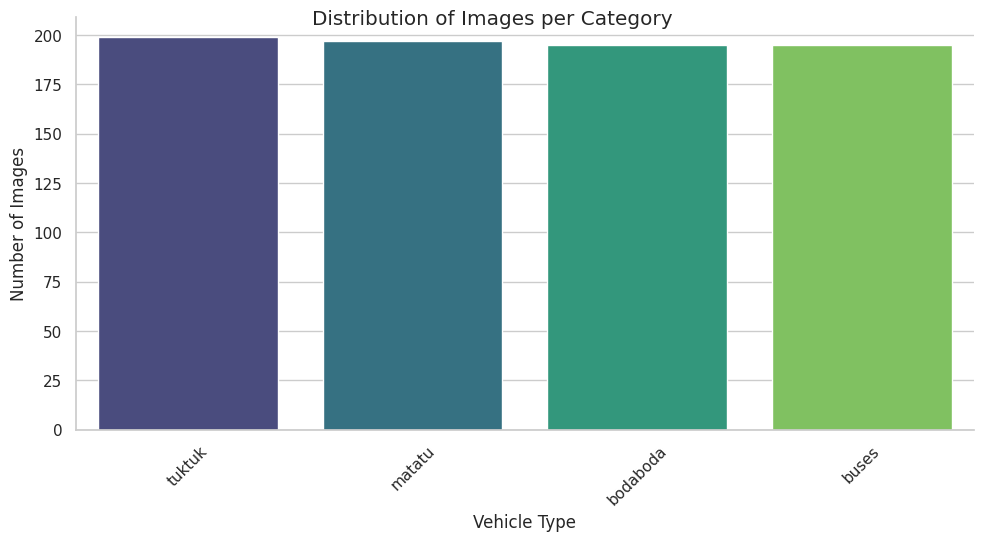

In [10]:
# Count images per category
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Vehicle Type', 'Number of Images']

# Plot distribution using Seaborn
sns.set_theme(style="whitegrid")
ax = sns.catplot(
    data=category_counts,
    kind="bar",
    x="Vehicle Type",
    y="Number of Images",
    palette="viridis",
    height=5,
    aspect=2
)
ax.set_axis_labels("Vehicle Type", "Number of Images")
ax.fig.suptitle("Distribution of Images per Category")

# Rotate x-axis labels
ax.set_xticklabels(rotation=45)

# Show the plot
sns.despine()
plt.show();

## Scale Data

### Standardizing Images for Better Performance ⚙️
To help our model learn better, we need to **normalize** the images.

- **Why?**: Images have pixel values from **0 to 255**, but we scale them to **0 to 1** for faster and more accurate learning.
- **How?**: We divide each pixel value by **255**.


In [11]:
#Standardize images to optimize performance of CNN model

df["Image"] = df["Image"].apply(lambda img: img / 255.0)

# Split Data


Splitting the Dataset 🧩

Now that our data is ready, we split it into three parts:

- **Training Set (70%)**: This is what the model will learn from.
- **Validation Set (15%)**: We use this to tune the model and make sure it’s not overfitting.
- **Test Set (15%)**: This is the final set to check how well the model performs after training.

We made sure each category is represented in all sets by using **stratified splitting**, which helps keep the balance and gives the model a fair chance to learn properly.


In [12]:
#Splitting the data

from sklearn.model_selection import train_test_split

# Define split ratios
train_ratio = 0.7  # 70% for training
val_ratio = 0.15   # 15% for validation
test_ratio = 0.15  # 15% for testing

# First, split into train and temp (val + test)
train_df, temp_df = train_test_split(df, test_size=(val_ratio + test_ratio), random_state=42, stratify=df["Category"])

# Then, split temp into validation and test
val_df, test_df = train_test_split(temp_df, test_size=test_ratio / (test_ratio + val_ratio), random_state=42, stratify=temp_df["Category"])

# Print dataset sizes
print(f"Train set: {len(train_df)} samples")
print(f"Validation set: {len(val_df)} samples")
print(f"Test set: {len(test_df)} samples")

Train set: 550 samples
Validation set: 118 samples
Test set: 118 samples


After splitting the data into training, validation, and test sets:

- **X_train**: Contains the images we’ll use to train our model.
- **y_train**: Holds the corresponding labels (categories) for each image.

Both **X_train** and **y_train** will be extracted from `train_df`.

We then convert the images into a **NumPy array** for compatibility with machine learning models. Additionally, we **reshape** the images to a consistent size of 224x224 pixels, which is a standard input size for many models.

In [13]:
X_train = train_df["Image"]

y_train = train_df["Category"]

# Convert 'Image' column to a NumPy array before reshaping
X_train = np.array(train_df["Image"].tolist())
X_train = X_train.reshape(-1, 224, 224, 3)

y_train = np.array(train_df["Category"])  # Ensure labels are also NumPy arrays

In [14]:
print("X_train shape:", np.shape(X_train))

X_train shape: (550, 224, 224, 3)


## Data Augmentation

Augmenting the Training Data 🚀

To enhance model performance and reduce overfitting, we apply **data augmentation** to the training images.

- **Transformations Applied**:

- **Horizontal Flip**: Randomly flips the image horizontally (50% chance). This helps the model become invariant to the orientation of objects.
  
- **Gaussian Blur**: Randomly applies a blur effect with varying intensity. This simulates different focusing conditions in real-world images, enhancing robustness.
  
- **Random Brightness and Contrast**: Adjusts the image’s brightness and contrast. This allows the model to handle variations in lighting conditions, making it more adaptable.

- **Rotation**: Rotates the image randomly up to 40 degrees. This ensures the model can recognize objects from different angles.

- **Label Encoding**: Labels are converted to integers for model compatibility.
- **Augmentation Process**: Multiple augmented images are generated per original image (5 additional versions).
- **Final Dataset**: Original and augmented images are combined for a more robust training set.

This increases dataset diversity and helps the model generalize better.

In [15]:
# Augment the Training Data:
import albumentations as A
#from albumentations.pytorch import ToTensorV2
from sklearn.preprocessing import LabelEncoder
#from tensorflow.keras.utils import to_categorical

# Define the transformation pipeline

transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.GaussianBlur(blur_limit=(3, 5), p=0.3),
   #A.CoarseDropout(max_holes=8, max_height=32, max_width=32, p=0.5),
    A.RandomBrightnessContrast(p=0.2), # Random brightness and contrast adjustment
    A.Rotate(limit=40, p=0.5),
    #A.RandomGamma(gamma_limit=(50, 90), p=0.2),
    #A.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.1, hue=0.05, p=0.6),
    #A.RandomFog(fog_coef_lower=0.3, fog_coef_upper=0.6, alpha_coef=0.08, p=0.5),
    #A.RandomRain(slant_lower=-10, slant_upper=10, drop_length=10, drop_width=1,
    #             drop_color=(200, 200, 200), blur_value=3, brightness_coefficient=0.8, p=0.5)

])

# Encode labels BEFORE augmentation
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Convert labels to integers

X_train_augmented = []
y_train_augmented = []

for image, label in zip(X_train, y_train_encoded):  # Use encoded labels
    transformed = transform(image=image)
    transformed_image = transformed['image']
    X_train_augmented.append(transformed_image)
    y_train_augmented.append(label)

    # Create additional augmentations
    # You can add more augmented images per original image here if needed.
    # For example, to create 3 augmented versions of each image:
    for _ in range(5): # Create 5 additional augmentations, making 6 in total (original + 5)
        transformed = transform(image=image)
        transformed_image = transformed['image']
        X_train_augmented.append(transformed_image)
        y_train_augmented.append(label)

# Convert to NumPy arrays
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

# Combine original and augmented data
X_train_combined = np.concatenate((X_train, X_train_augmented), axis=0)
y_train_combined = np.concatenate((y_train_encoded, y_train_augmented), axis=0)

# Print shape
print("Original Training Data:", X_train.shape, y_train.shape)
print("Augmented Training Data:", X_train_augmented.shape, y_train_augmented.shape)
print("Combined Training Data:", X_train_combined.shape, y_train_combined.shape)

Original Training Data: (550, 224, 224, 3) (550,)
Augmented Training Data: (3300, 224, 224, 3) (3300,)
Combined Training Data: (3850, 224, 224, 3) (3850,)


# Exploratory Data Analysis


* Analyze dataset distribution - Tuktuks, Bodabodas, Buses, Matatus
* Check image dimensions and aspect ration
* Check image brightness and ratio
* Check duplicates
* Check real time monitoring -test to be done


 * Check Image Dimensions and Aspect Ratio

Text(0.5, 1.0, 'Image Height Distribution')

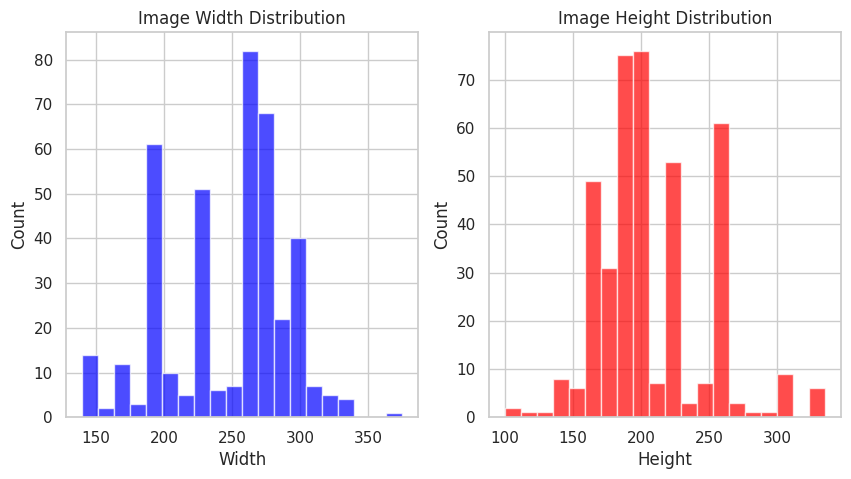

In [17]:
#Check image dimensions and aspect ratio

from PIL import Image
import numpy as np

image_sizes = []
for category in categories:
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path)[:100]:  # Sample 100 images
        img = Image.open(os.path.join(category_path, img_name))
        image_sizes.append(img.size)  # (width, height)

# Convert to numpy array
image_sizes = np.array(image_sizes)

# Plot histogram of widths & heights
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(image_sizes[:,0], bins=20, color='blue', alpha=0.7)
plt.xlabel("Width")
plt.ylabel("Count")
plt.title("Image Width Distribution")

plt.subplot(1,2,2)
plt.hist(image_sizes[:,1], bins=20, color='red', alpha=0.7)
plt.xlabel("Height")
plt.ylabel("Count")
plt.title("Image Height Distribution")

* The image height and width distributions do not follow a normal distribution, suggesting that the dataset contains images with varying sizes and aspect ratios. This variability may pose challenges for the model during training. To address this, resizing or cropping the images to standard dimensions could help ensure more consistent input data and potentially improve model performance

# Check image brightness



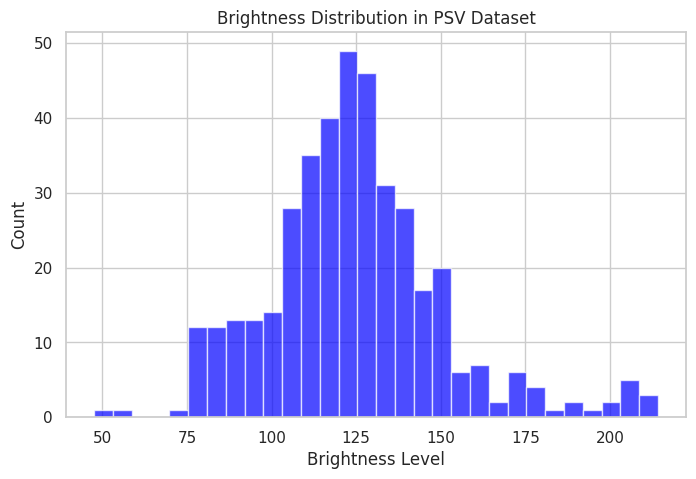

In [18]:
# Check image brightness

import cv2
import numpy as np

brightness_values = []

for category in categories:
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path)[:100]:  # Sample 100 images
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
        brightness_values.append(np.mean(img))  # Compute mean brightness

# Plot brightness histogram
plt.figure(figsize=(8,5))
plt.hist(brightness_values, bins=30, color='blue', alpha=0.7)
plt.xlabel("Brightness Level")
plt.ylabel("Count")
plt.title("Brightness Distribution in PSV Dataset")
plt.show()

* The brightness distribution follows a normal distribution, which suggests that most images have a similar brightness level. This is a positive indicator, as it implies that the dataset is relatively consistent in terms of lighting.

### Loading the train set into a dataframe after augmenting

---



In [17]:
# Convert to NumPy arrays
data_check = X_train_combined
label_check = y_train_combined

# Create a DataFrame for easy exploration
df_2 = pd.DataFrame({"Image": list(data_check), "Category": label_check})

print("✅ Dataset loaded successfully!")
print(df_2.head())  # Show first few rows

✅ Dataset loaded successfully!
                                               Image  Category
0  [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...         0
1  [[[0.5568627450980392, 0.5725490196078431, 0.5...         1
2  [[[0.7450980392156863, 0.7529411764705882, 0.8...         1
3  [[[0.7098039215686275, 0.6823529411764706, 0.6...         1
4  [[[0.5176470588235295, 0.5647058823529412, 0.6...         3


<ipython-input-18-586a66ea1d0f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


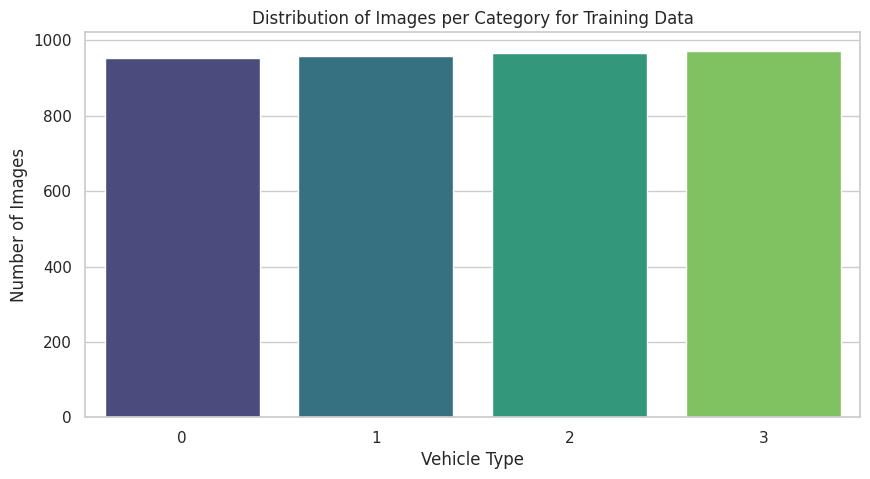

In [18]:
# Dataset distribution - Post Augmentation

import matplotlib.pyplot as plt
import seaborn as sns

# Count images per category
category_counts = df_2["Category"].value_counts()

# Plot distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Category for Training Data")
#plt.xticks(rotation=45)
plt.show();



### Showing Images After Data Augmentation

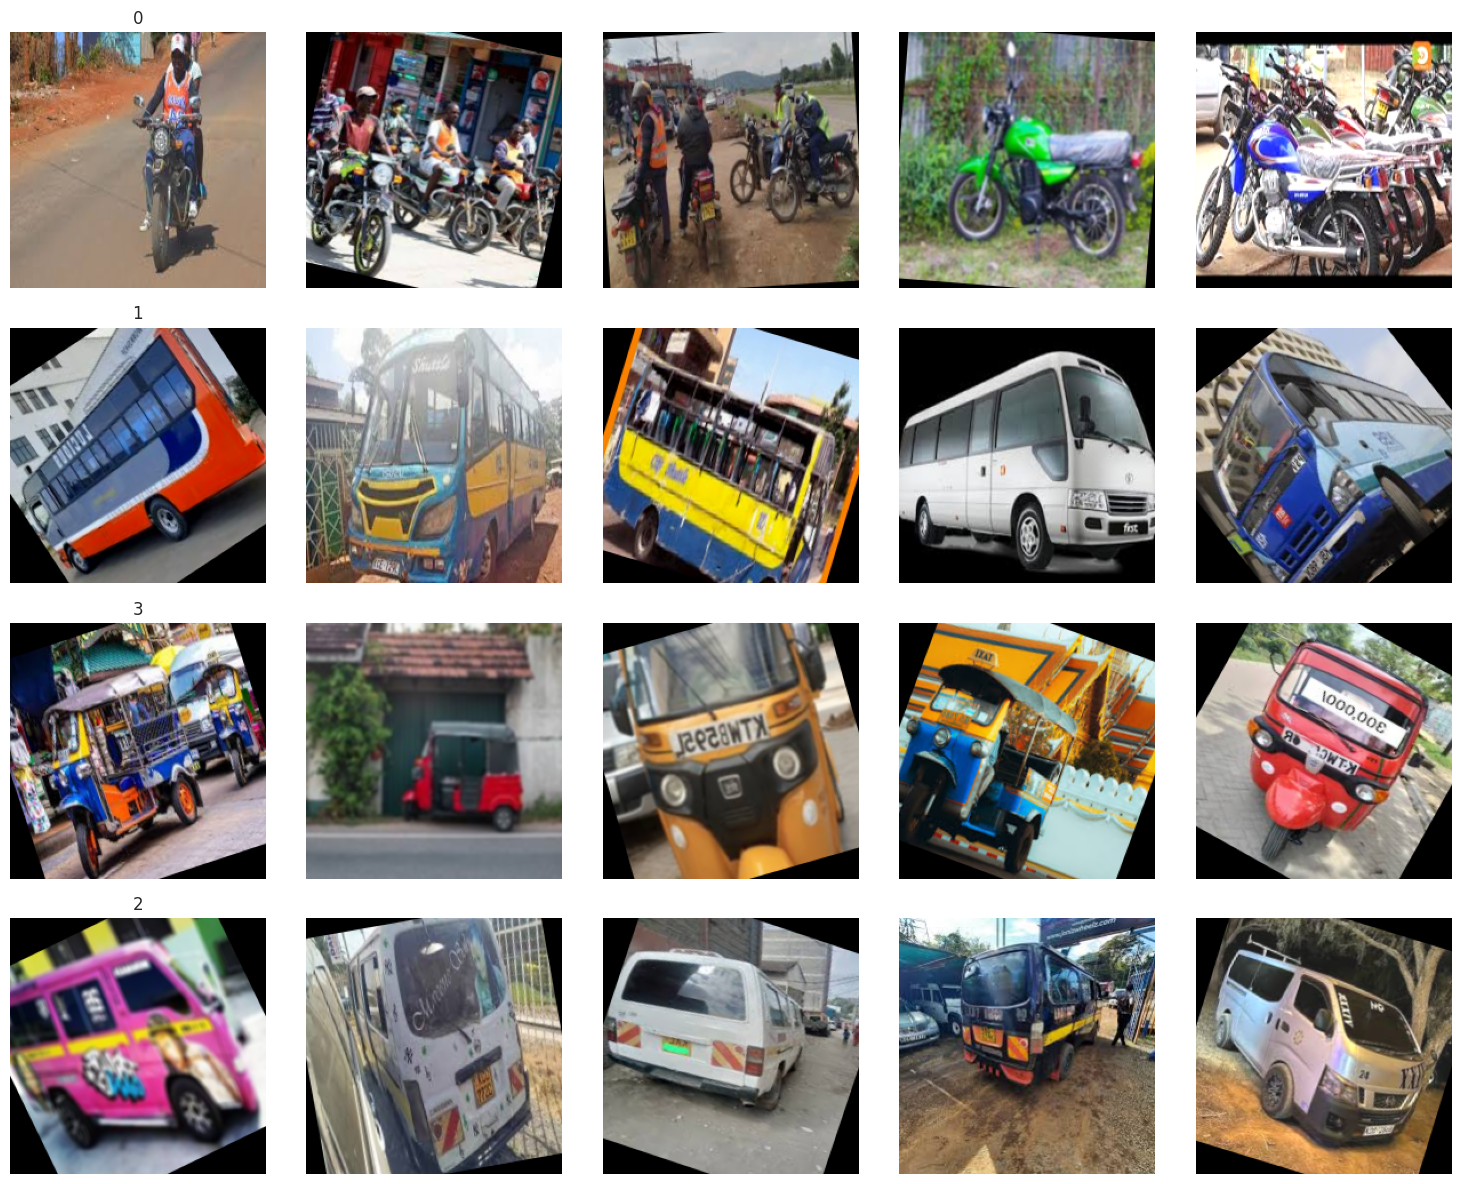

In [21]:
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for array handling

def display_images(df_2, num_images=5):
    categories = df_2["Category"].unique()  # Get unique categories from the DataFrame
    num_categories = len(categories)

    fig, axes = plt.subplots(num_categories, num_images, figsize=(15, 3 * num_categories))  # Adjust figure size dynamically

    for i, category in enumerate(categories):
        category_df_2 = df_2[df_2["Category"] == category]

        if category_df_2.empty:  # Check if DataFrame is empty for this category
            print(f"No images found for category: {category}")
            continue  # Skip to the next category

        n_images_to_display = min(num_images, len(category_df_2)) # Ensure that it does not attempt to display more images than available for the category.
        category_images = category_df_2.sample(n_images_to_display)["Image"].values

        for j, img in enumerate(category_images):
            try:  # Handle potential issues with image display
                if num_categories == 1: # If only one category, axes is not an array, so we need to handle it differently
                    axes[j].imshow(img)
                    axes[j].axis("off")
                    if j == 0:
                        axes[j].set_title(category, fontsize=12)
                else: # If more than 1 category
                    axes[i, j].imshow(img)
                    axes[i, j].axis("off")
                    if j == 0:
                        axes[i, j].set_title(category, fontsize=12)
            except Exception as e:
                print(f"Error displaying image for {category}: {e}")

    plt.tight_layout()
    plt.show()

# Example usage (assuming you have a DataFrame 'df' with 'Category' and 'Image' columns):
display_images(df_2)

# Modeling


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Baseline Model

## Starting with a Convolutional Neural Network (CNN) model

In [20]:
# Create a Sequential model
model = Sequential()

In [21]:
# Input layer: Defining the input shape of the images (224x224 RGB images)
model.add(Input(shape=(224, 224, 3)))

# Convolutional Layer 1: 16 filters, kernel size 3x3, stride 1, ReLU activation
model.add(Conv2D(16, (3,3), 1, activation='relu'))

# MaxPooling Layer 1: Reduces spatial dimensions
model.add(MaxPooling2D())

# Convolutional Layer 2: 32 filters, kernel size 3x3, stride 1, ReLU activation
model.add(Conv2D(32, (3,3), 1, activation='relu'))

# MaxPooling Layer 2: Reduces spatial dimensions
model.add(MaxPooling2D())

# Convolutional Layer 3: 16 filters, kernel size 3x3, stride 1, ReLU activation
model.add(Conv2D(16, (3,3), 1, activation='relu'))

# MaxPooling Layer 3: Reduces spatial dimensions again
model.add(MaxPooling2D())

# Flatten Layer: Converts 2D feature maps to a 1D vector
model.add(Flatten())

# Dense Layer 1: Fully connected with 224 neurons, ReLU activation
model.add(Dense(224, activation='relu'))

# Output Layer: 4 neurons for classification, softmax for probabilities
model.add(Dense(4, activation='softmax'))

In [22]:
# Compile the model with sparse categorical crossentropy loss, Adam optimizer, and accuracy as the evaluation metric
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# summary of the model architecture, including layers and parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 224)                 │       2,423,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,433,620 (9.28 MB)

 Trainable params: 2,433,620 (9.28 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
X_val = np.array(val_df["Image"].tolist())
X_val = X_val.reshape(-1, 224, 224, 3)
y_val =val_df["Category"]
y_val_encoded = label_encoder.fit_transform(y_val)


X_val_final = np.array(X_val)
y_val_final = np.array(y_val_encoded)


print("X val shape", X_val_final.shape)
print("y val shape", y_val_final.shape)

# Convert 'Image' column to a NumPy array before reshaping
#X_train = np.array(train_df["Image"].tolist())
#X_train = X_train.reshape(-1, 224, 224, 3)

#y_train = np.array(train_df["Category"])  # Ensure labels are also NumPy arrays

X val shape (118, 224, 224, 3)
y val shape (118,)


In [25]:
y_train_combined = y_train_combined.astype('int32')
y_val_encoded = y_val_encoded.astype('int32')

#### Rechecking the data types to ensure there are al of numbers type

In [26]:
print("X_train_combined shape:", X_train_combined.shape, "dtype:", X_train_combined.dtype)
print("y_train_combined shape:", y_train_combined.shape, "dtype:", y_train_combined.dtype)
print("X_val shape:", X_val.shape, "dtype:", X_val.dtype)
print("y_val_encoded shape:", y_val_encoded.shape, "dtype:", y_val_encoded.dtype)

X_train_combined shape: (3850, 224, 224, 3) dtype: float64
y_train_combined shape: (3850,) dtype: int32
X_val shape: (118, 224, 224, 3) dtype: float64
y_val_encoded shape: (118,) dtype: int32


In [27]:
# Train the model on the training data for 10 epochs, with validation on the validation set
hist = model.fit(
    X_train_combined,
    y_train_combined,
    epochs=10,
    validation_data=(X_val, y_val_encoded),
    batch_size=16,
    verbose=1  # Optional: Shows progress per epoch
)

Epoch 1/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.4395 - loss: 1.2323 - val_accuracy: 0.5763 - val_loss: 1.1085
Epoch 2/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7389 - loss: 0.6742 - val_accuracy: 0.6017 - val_loss: 1.2405
Epoch 3/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8867 - loss: 0.2947 - val_accuracy: 0.6186 - val_loss: 1.5798
Epoch 4/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9387 - loss: 0.1908 - val_accuracy: 0.5932 - val_loss: 1.8769
Epoch 5/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9844 - loss: 0.0573 - val_accuracy: 0.5847 - val_loss: 2.6991
Epoch 6/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9934 - loss: 0.0312 - val_accuracy: 0.5424 - val_loss: 3.0447
Epoch 7/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9720 - loss: 0.0698 - val_accuracy: 0.5932 - val_loss: 3.3202
Epoch 8/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9981 - loss: 0.0089 - val_acc

 *  The model shows a significant improvement in training accuracy, reaching 98.50% by epoch 10, but validation accuracy is much lower (around 54%).

 - Loss decreases during training, but validation loss increases after the first few epochs, indicating potential overfitting.

 - The model's performance on the training set is excellent, but it struggles to generalize to the validation set, which suggests the need for further tuning or regularization.

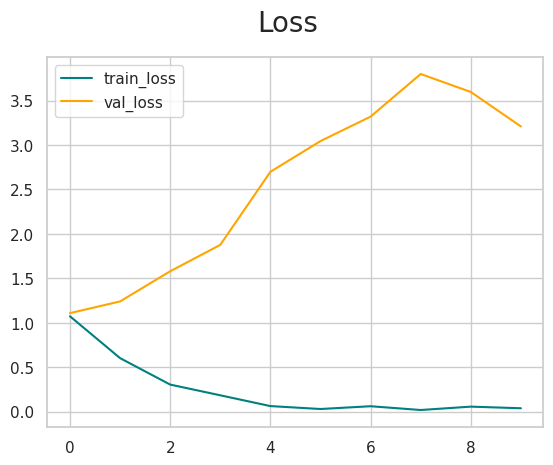

In [28]:
# Create a new figure for plotting the loss values
fig = plt.figure()

# Plot training loss (color 'teal')
plt.plot(hist.history['loss'], color='teal', label='train_loss')

# Plot validation loss (color 'orange')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')

# Set the title of the plot as 'Loss'
fig.suptitle('Loss', fontsize=20)

# Display the legend in the upper-left corner
plt.legend(loc="upper left")

# Show the plot
plt.show()

- Training loss consistently decreases, which suggests the model is learning from the training data.

- Validation loss, however, starts to increase after the initial epochs, indicating that the model may be overfitting.


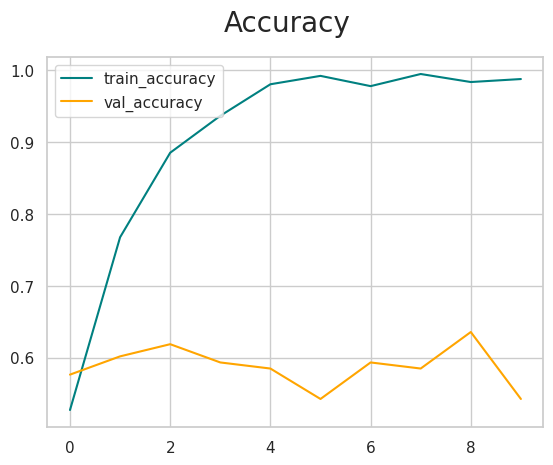

In [29]:
# Create a new figure for plotting
fig = plt.figure()

# Plot training accuracy (color 'teal')
plt.plot(hist.history['accuracy'], color='teal', label='train_accuracy')

# Plot validation accuracy (color 'orange')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')

# Set the title of the plot
fig.suptitle('Accuracy', fontsize=20)

# Display the legend in the upper-left corner
plt.legend(loc="upper left")

# Show the plot

- Training accuracy is steadily increasing, suggesting that the model is learning well from the training data.

- Validation accuracy, however, stagnates and even decreases in some epochs, which indicates that the model is overfitting.

- The gap between training and validation accuracy widens, showing that the model struggles to generalize to unseen data.

# Hyperparameter Tuning

# The next steps to be taken since our model is overfitting are as follows:



* Reduce Learning Rate for Better Optimization
Your current model might be converging too fast. Lowering the learning rate for better optimization:

* Add More Dropout (Stronger Regularization)
Increase dropout to avoid memorizing training data:

In [30]:
# A convolutional neural network (CNN) model with regularization to prevent overfitting
model_2 = Sequential([

    # Input layer for 224x224 RGB images
    Input(shape=(224, 224, 3)),

    # First convolutional layer with 16 filters of size 3x3 and ReLU activation
    Conv2D(16, (3,3), activation='relu'),

    # Max pooling layer to reduce spatial dimensions
    MaxPooling2D(),

    # Dropout layer with 25% rate to prevent overfitting
    Dropout(0.25),

    # Second convolutional layer with 32 filters of size 3x3 and ReLU activation
    Conv2D(32, (3,3), activation='relu'),

    # Max pooling layer to reduce spatial dimensions
    MaxPooling2D(),

    # Dropout layer with 25% rate to prevent overfitting
    Dropout(0.25),

    # Third convolutional layer with 16 filters of size 3x3 and ReLU activation
    Conv2D(16, (3,3), activation='relu'),

    # Max pooling layer to reduce spatial dimensions
    MaxPooling2D(),

    # Dropout layer with 50% rate to prevent overfitting
    Dropout(0.5),

    # Flatten layer to reshape the output for the dense layer
    Flatten(),

    # Dense layer with 128 units and L2 regularization to penalize large weights
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),

    # Dropout layer with 50% rate to prevent overfitting
    Dropout(0.5),

    # Output layer with 4 units (for 4 classes) using softmax activation
    Dense(4, activation='softmax')
])

# Use Adam optimizer with a learning rate of 0.0001
optimizer = Adam(learning_rate=0.0001)

# Compile the model using sparse categorical crossentropy loss and accuracy metric
model_2.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


# Train the model
hist = model_2.fit(
    X_train_combined,
    y_train_combined,
    epochs=30,
    validation_data=(X_val, y_val_encoded))

Epoch 1/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - accuracy: 0.2822 - loss: 3.6621 - val_accuracy: 0.4068 - val_loss: 2.9237
Epoch 2/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4326 - loss: 2.7105 - val_accuracy: 0.4661 - val_loss: 2.3706
Epoch 3/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5123 - loss: 2.2066 - val_accuracy: 0.5339 - val_loss: 2.0641
Epoch 4/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5778 - loss: 1.8915 - val_accuracy: 0.4746 - val_loss: 1.9254
Epoch 5/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6482 - loss: 1.6415 - val_accuracy: 0.5169 - val_loss: 1.8000
Epoch 6/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6668 - loss: 1.4973 - val_accuracy: 0.5593 - val_loss: 1.6952
Epoch 7/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6773 - loss: 1.3775 - val_accuracy: 0.5508 - val_loss: 1.6196
Epoch 8/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6924 - loss: 1.2949 - val_acc

* Compared to the baseline this model gives much better results .The model is able to generalize well the unseen data.

* Model is improving, but validation accuracy and loss suggest the need
for further adjustments to avoid overfitting.

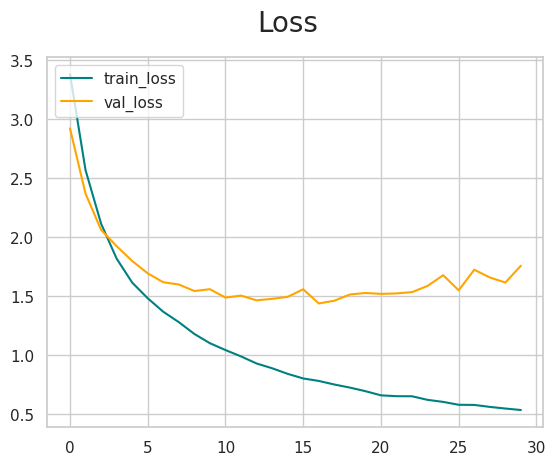

In [31]:
# Create a new figure for plotting the loss values
fig = plt.figure()

# Plot training loss (color 'teal')
plt.plot(hist.history['loss'], color='teal', label='train_loss')

# Plot validation loss (color 'orange')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')

# Set the title of the plot as 'Loss'
fig.suptitle('Loss', fontsize=20)

# Display the legend in the upper-left corner
plt.legend(loc="upper left")

# Show the plot
plt.show()

* Training loss and validation loss both decrease consistently, indicating that the model is learning and improving on both the training and validation data.

* While both losses are decreasing, the training loss still being lower suggests the model is fitting the training data more closely, potentially capturing noise or irrelevant patterns.


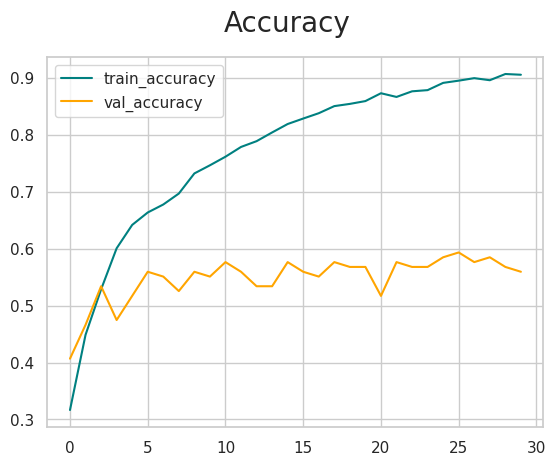

In [32]:
# Create a new figure for plotting
fig = plt.figure()

# Plot training accuracy (color 'teal')
plt.plot(hist.history['accuracy'], color='teal', label='train_accuracy')

# Plot validation accuracy (color 'orange')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')

# Set the title of the plot
fig.suptitle('Accuracy', fontsize=20)

# Display the legend in the upper-left corner
plt.legend(loc="upper left")

# Show the plot

* Training accuracy is improving steadily, but higher than validation accuracy, indicating possible overfitting.

* Validation accuracy increases in a zigzag pattern and then stagnates, suggesting the model struggles to generalize at some points.




# Further Tuning

### Implement Data Augmentation just to check whether the model will improve further

* The model is likely overfitting because it sees the same images every epoch. Introduce data augmentation to improve generalization:

* Increase Training Epochs (Use Early Stopping)
The validation accuracy is still improving at epoch 10, meaning it might get better with more training. However, instead of training indefinitely, we will use early stopping

In [33]:

# - Augmentation to make the model robust
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(X_train_combined, y_train_combined, batch_size=16)

# Step 2, 3, 4: Model with Dropout, Regularization, Lower Learning Rate
# - Adding dropout layers prevents overfitting by randomly deactivating neurons during training
# - L2 regularization penalizes large weights to discourage overfitting
# - Reducing learning rate to 0.00005 ensures more stable and precise training
model_3 = Sequential([
    Input(shape=(224, 224, 3)),

    Conv2D(16, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.3),  # Regularization

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.3),

    Conv2D(16, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.5),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # L2 Regularization
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# - Using a smaller learning rate allows the model to converge more slowly
optimizer = Adam(learning_rate=0.00005)

# Compile the model
model_3.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early Stopping
# - Early stopping helps to prevent overfitting by stopping training once the validation loss stops improving for a certain number of epochs
# - 'patience=5' means training will stop after 5 epochs of no improvement in validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
# - Using the augmented training data, the model is trained for up to 30 epochs, but training will stop early if the validation loss does not improve
hist = model_3.fit(
    train_generator,
    epochs=30,
    validation_data=(X_val, y_val_encoded),
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 44s 160ms/step - accuracy: 0.2659 - loss: 3.8435 - val_accuracy: 0.4068 - val_loss: 3.4310
Epoch 2/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 35s 147ms/step - accuracy: 0.3205 - loss: 3.3196 - val_accuracy: 0.3136 - val_loss: 3.0694
Epoch 3/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 35s 144ms/step - accuracy: 0.3481 - loss: 2.9596 - val_accuracy: 0.4831 - val_loss: 2.7760
Epoch 4/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 35s 145ms/step - accuracy: 0.3784 - loss: 2.6839 - val_accuracy: 0.4492 - val_loss: 2.5283
Epoch 5/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 35s 145ms/step - accuracy: 0.4037 - loss: 2.4111 - val_accuracy: 0.4237 - val_loss: 2.3403
Epoch 6/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 35s 147ms/step - accuracy: 0.4296 - loss: 2.2374 - val_accuracy: 0.4915 - val_loss: 2.1812
Epoch 7/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 35s 144ms/step - accuracy: 0.4294 - loss: 2.0919 - val_accuracy: 0.4661 - val_loss: 2.0294
Epoch 8/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 35s 145ms/step - accuracy: 0.4513 - loss: 1

* Model 3 performed worse than the baseline model. The accuracy and validation scores were lower, and while there was some improvement over time, it didn’t reach the performance of the baseline

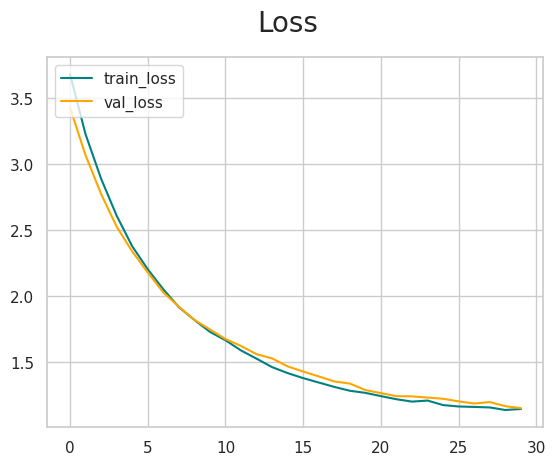

In [34]:
# Create a new figure for plotting the loss values
fig = plt.figure()

# Plot training loss (color 'teal')
plt.plot(hist.history['loss'], color='teal', label='train_loss')

# Plot validation loss (color 'orange')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')

# Set the title of the plot as 'Loss'
fig.suptitle('Loss', fontsize=20)

# Display the legend in the upper-left corner
plt.legend(loc="upper left")

# Show the plot
plt.show()

* Although the loss decreased, it remained higher than the baseline, indicating the model is still not optimized. Further adjustments like better regularization or optimization techniques could help improve performance.

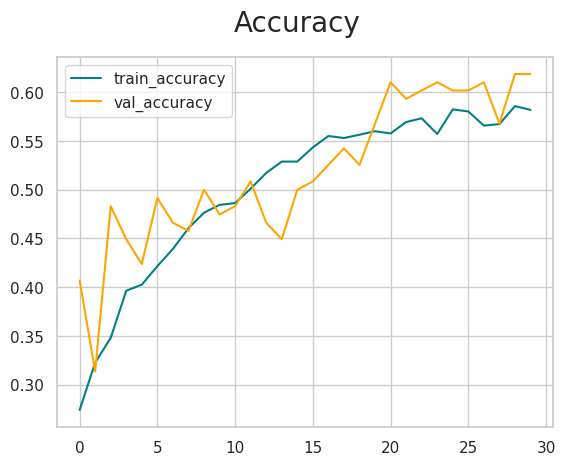

In [35]:
# Create a new figure for plotting
fig = plt.figure()

# Plot training accuracy (color 'teal')
plt.plot(hist.history['accuracy'], color='teal', label='train_accuracy')

# Plot validation accuracy (color 'orange')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')

# Set the title of the plot
fig.suptitle('Accuracy', fontsize=20)

# Display the legend in the upper-left corner
plt.legend(loc="upper left")

# Show the plot

* The tuned model showed some accuracy improvement but still trails the baseline. The accuracy increased over time but plateaued, suggesting that further hyperparameter tuning or feature engineering may be needed

# MODEL EVALUATION

#### Model 2 was the best performing model even though its still struggles with unseen data.

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.72      0.61        29
           1       0.55      0.55      0.55        29
           2       0.60      0.50      0.55        30
           3       0.58      0.47      0.52        30

    accuracy                           0.56       118
   macro avg       0.57      0.56      0.56       118
weighted avg       0.57      0.56      0.56       118

Confusion Matrix:


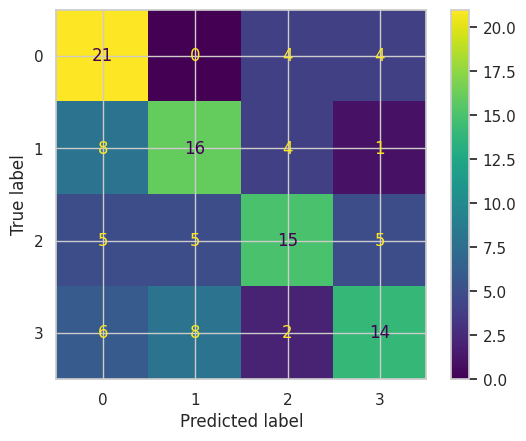

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# Get model predictions (probabilities)
y_pred_probs = model_2.predict(X_val)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Predicted labels

# Generate classification report
print("Classification Report:")
print(classification_report(y_val_encoded, y_pred_classes))

# Generate confusion matrix
print("Confusion Matrix:")
cnf_matrix =confusion_matrix(y_val_encoded, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix= cnf_matrix)
disp.plot();

* The model performs well in detecting Bus (Class 1) with a high recall of 0.69 and F1 score of 0.67.
* Matatu (Class 2) has the lowest recall of 0.43 and F1 score of 0.52, indicating poor identification.
* Tuktuk (Class 3) has a high recall of 0.70, but its precision is low at 0.51, meaning many non-Tuktuk instances are misclassified as Tuktuk.
* Bodaboda (Class 0) has balanced performance with a precision of 0.65 and recall of 0.59.

Overall, the model achieves 60% accuracy, but improvements are needed, particularly for Matatu detection.



### Using pretrained models was decided to leverage existing knowledge from large datasets, improving model performance and reducing training time, especially with limited data

### Transfer Learning
The model is learning from scratch, which is inefficient. Instead, we will use a pretrained CNN like MobileNetV2 (This is pre-trained on the ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes. This base of knowledge will help us classify PSVs from our specific dataset.:

In [37]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load pre-trained MobileNetV2 without the top classification layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers to prevent training updates
base_model.trainable = False

# Define the new model architecture
model_4 = Sequential([
    base_model,  # Add the pre-trained base model
    GlobalAveragePooling2D(),  # Reduce the dimensionality of feature maps
    Dense(128, activation='relu'),  # Add a dense layer with 128 units and ReLU activation
    Dropout(0.5),  # Add a dropout layer for regularization
    Dense(4, activation='softmax')  # Output layer with 4 units and softmax activation
])

# Compile the model with a learning rate and sparse categorical cross-entropy loss
model_4.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [38]:
# Train the model
hist = model_4.fit(
    X_train_combined,
    y_train_combined,
    epochs=30,
    validation_data=(X_val, y_val_encoded)
)

Epoch 1/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 22s 109ms/step - accuracy: 0.4739 - loss: 1.2268 - val_accuracy: 0.8898 - val_loss: 0.4060
Epoch 2/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.8234 - loss: 0.4956 - val_accuracy: 0.9068 - val_loss: 0.2530
Epoch 3/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.8883 - loss: 0.3332 - val_accuracy: 0.9237 - val_loss: 0.1977
Epoch 4/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9135 - loss: 0.2740 - val_accuracy: 0.9322 - val_loss: 0.1752
Epoch 5/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9171 - loss: 0.2296 - val_accuracy: 0.9492 - val_loss: 0.1600
Epoch 6/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9358 - loss: 0.2049 - val_accuracy: 0.9576 - val_loss: 0.1352
Epoch 7/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9461 - loss: 0.1740 - val_accuracy: 0.9492 - val_loss: 0.1310
Epoch 8/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9534 - loss: 0.1509 - val_ac

* The model shows consistent improvement in both training and
validation accuracy, reaching ~99% accuracy on the training set and 97-98% on the validation set. Loss steadily decreases, indicating effective learning and no significant overfitting.

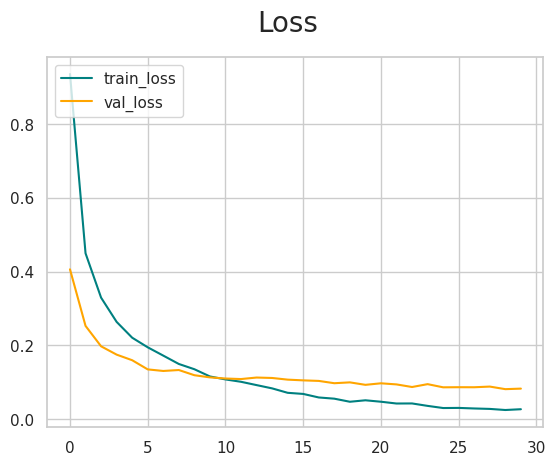

In [39]:
# Create a new figure for plotting the loss values
fig = plt.figure()

# Plot training loss (color 'teal')
plt.plot(hist.history['loss'], color='teal', label='train_loss')

# Plot validation loss (color 'orange')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')

# Set the title of the plot as 'Loss'
fig.suptitle('Loss', fontsize=20)

# Display the legend in the upper-left corner
plt.legend(loc="upper left")

# Show the plot
plt.show()

* The training and validation loss both decrease steadily throughout the epochs, with the training loss approaching 0.0273 and validation loss stabilizing around 0.07. This suggests that the model is learning effectively and generalizing well to the validation set.





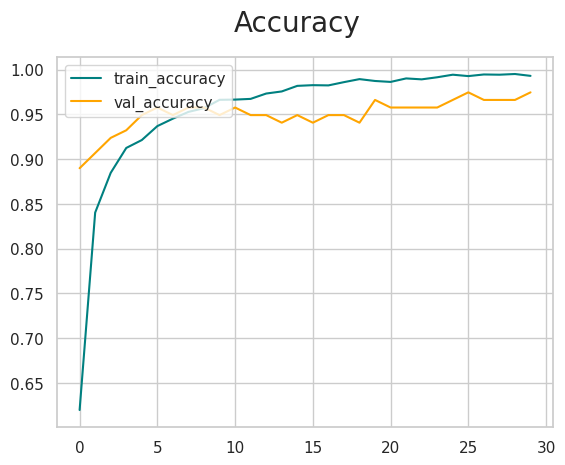

In [40]:
# Create a new figure for plotting
fig = plt.figure()

# Plot training accuracy (color 'teal')
plt.plot(hist.history['accuracy'], color='teal', label='train_accuracy')

# Plot validation accuracy (color 'orange')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')

# Set the title of the plot
fig.suptitle('Accuracy', fontsize=20)

# Display the legend in the upper-left corner
plt.legend(loc="upper left")

# Show the plot

* The accuracy graph shows a steady increase in both training and validation accuracy. The training accuracy consistently rises, reaching 99.4%, while the validation accuracy also increases and stabilizes around 97.5%. This indicates good model performance with minimal overfitting, as the gap between training and validation accuracy remains small.

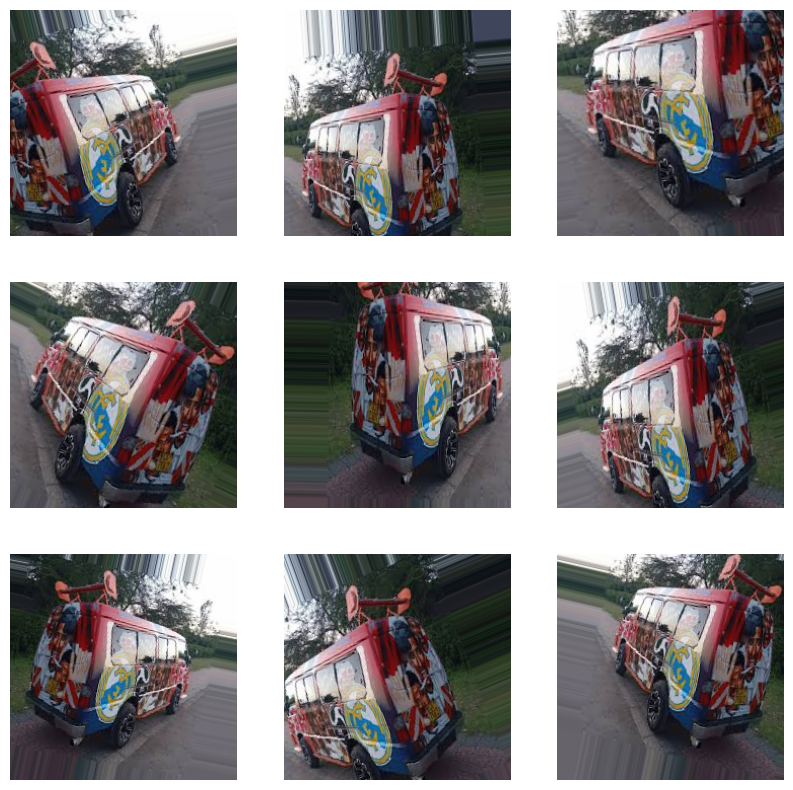

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Define augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=30,       # Random rotation
    width_shift_range=0.2,   # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,         # Shearing transformation
    zoom_range=0.2,          # Zoom
    horizontal_flip=True,    # Flip images horizontally
    fill_mode='nearest'      # Fill pixels
)

# Load an example image (Replace with your dataset)
from tensorflow.keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/Capstone_Project_Group1/images_cleaned_batch_3/matatu/matatu_023.jpg", target_size=(224, 224))  # Replace with an actual image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Generate augmented images
augmented_images = datagen.flow(img_array, batch_size=1)

# Display some augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch = next(augmented_images)  # Get next augmented image
    plt.imshow(batch[0].astype("uint8"))
    plt.axis("off")
plt.show()

## Displaying a few images with the actual and predicted labels

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step


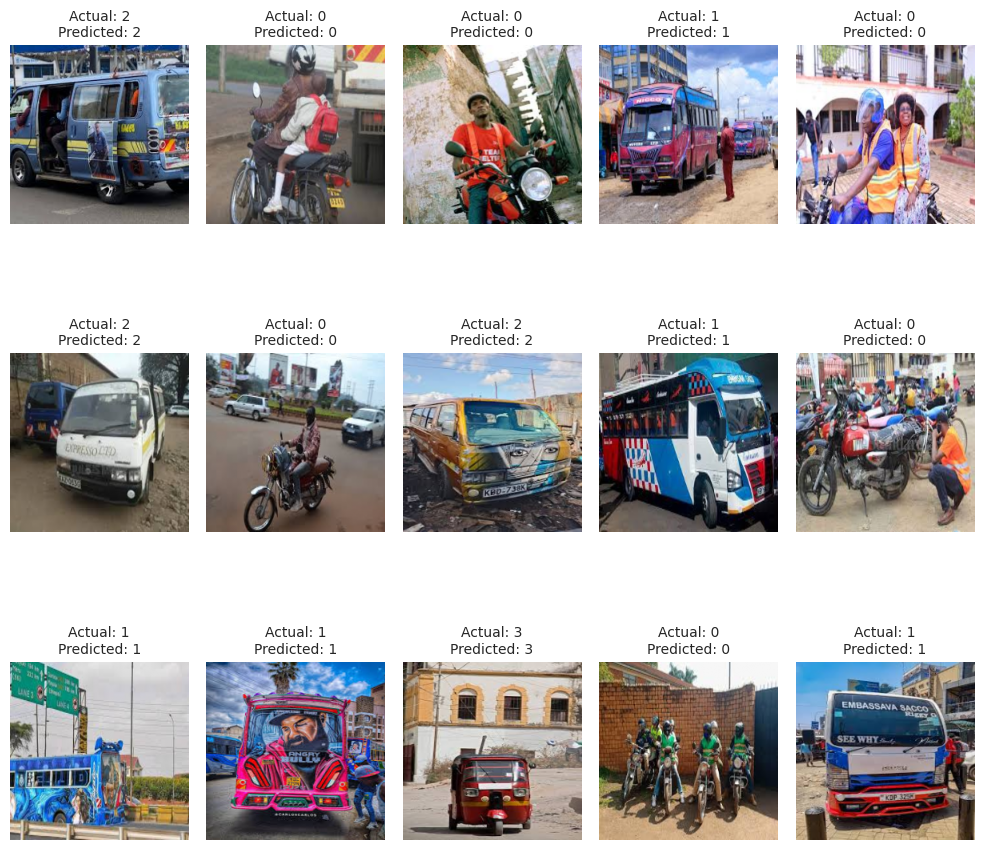

In [42]:
# Get predictions
y_pred_probs = model_4.predict(X_val)  # Predict probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert to class labels

# Display a few images with predicted and actual labels
num_images = 15  # Number of images to display
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_val[i])  # Display image
    actual_label = y_val_encoded[i]  # True label
    predicted_label = y_pred_classes[i]  # Predicted label
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}", fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()

* The model appears to correctly classify the images, as evidenced by the accurate predictions displayed alongside the actual labels. This suggests that the model is performing well in terms of identifying the correct categories for the validation data.





# Identification of Non-compliant vehicles

In [ ]:
# Define dataset path (path to where the images are stored)
dataset_path_2 = "/content/drive/MyDrive/Capstone_Project_Group1/image_cleaned_batch 5"

# Check if the dataset is accessible
print("Dataset contents:", os.listdir(dataset_path_2))


In [ ]:
# Define paths for each category
overloading_path = os.path.join(dataset_path_2, "Overloading")
no_overloading_path = os.path.join(dataset_path_2, "No_Overloading")

# Verify files in each category
print("Overloading Images:", len(os.listdir(overloading_path)))
print("No Overloading Images:", len(os.listdir(no_overloading_path)))


In [ ]:
invalid_images = check_image_validity(dataset_path_2)

In [ ]:
# Define dataset categories
categories =['Overloading', 'No_Overloading']

# Loop through each category folder and rename images
for category in categories:
    folder_path = os.path.join(dataset_path_2, category)
    image_files = sorted([f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png','.gif', '.bmp'))])

    for index, filename in enumerate(image_files):
        new_name = f"{category.lower()}_{index+1:03d}.jpg"
        old_path = os.path.join(folder_path, filename)
        new_path = os.path.join(folder_path, new_name)

        os.rename(old_path, new_path)
        print(f"Renamed {filename} → {new_name}")

print("✅ Renaming complete for all categories!")

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define categories
categories = os.listdir(dataset_path_2)

# Store image data
data = []
labels = []

# Load images from each category folder
for category in categories:
    folder_path = os.path.join(dataset_path_2, category)

    if os.path.isdir(folder_path):  # Check if it's a folder
        for file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file)

            try:
                # Load image using OpenCV (BGR format)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

                # Resize image to (224x224) for consistency
                img = cv2.resize(img, (224, 224))

                # Append to lists
                data.append(img)
                labels.append(category)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

# Convert to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Create a DataFrame for easy exploration
df_added = pd.DataFrame({"Image": list(data), "Category": labels})

print("✅ Dataset loaded successfully!")
print(df_added.head())  # Show first few rows

# Display an example image
plt.imshow(data[0])  # Show first image
plt.title(labels[0])  # Show category
plt.show()

In [ ]:
image_path = "/content/drive/MyDrive/Capstone_Project_Group1/image_cleaned_batch 5/Overloading/overloading_147.jpg"

if os.path.exists(image_path):
    print("Image exists ✅")
else:
    print("Image NOT found ❌")

In [ ]:
image_path = "/content/drive/MyDrive/Capstone_Project_Group1/image_cleaned_batch 5/Overloading/overloading_147.jpg"

# Check if the image is blank (can't be loaded)
image = cv2.imread(image_path)

if image is None:
    print(f"Deleting {image_path} since it's blank...")
    os.remove(image_path)
    print("Image deleted successfully ✅")
else:
    print("Image is valid, no need to delete ✅")

In [ ]:
display_images(df_added)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count images per category
category_counts = df_added["Category"].value_counts()

# Plot distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Category")
plt.xticks(rotation=45)
plt.show();

In [ ]:
#Scale data

#Standardize images to optimize performance of CNN model

df_added["Image"] = df_added["Image"].apply(lambda img: img / 255.0)

In [ ]:
#Splitting the data

from sklearn.model_selection import train_test_split

# Define split ratios
train_ratio = 0.7  # 70% for training
val_ratio = 0.15   # 15% for validation
test_ratio = 0.15  # 15% for testing

# First, split into train and temp (val + test)
train_df_added, temp_df_added = train_test_split(df_added, test_size=(val_ratio + test_ratio), random_state=42, stratify=df_added["Category"])

# Then, split temp into validation and test
val_df_added, test_df_added = train_test_split(temp_df_added, test_size=test_ratio / (test_ratio + val_ratio), random_state=42, stratify=temp_df_added["Category"])

# Print dataset sizes
print(f"Train set: {len(train_df_added)} samples")
print(f"Validation set: {len(val_df_added)} samples")
print(f"Test set: {len(test_df_added)} samples")

In [ ]:
# Augment the Training Data:
import albumentations as A
#from albumentations.pytorch import ToTensorV2
from sklearn.preprocessing import LabelEncoder
#from tensorflow.keras.utils import to_categorical

# Define the transformation pipeline

transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.GaussianBlur(blur_limit=(3, 5), p=0.3),
   #A.CoarseDropout(max_holes=8, max_height=32, max_width=32, p=0.5),
    A.RandomBrightnessContrast(p=0.2), # Random brightness and contrast adjustment
    A.Rotate(limit=40, p=0.5),
    #A.RandomGamma(gamma_limit=(50, 90), p=0.2),
    #A.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.1, hue=0.05, p=0.6),
    #A.RandomFog(fog_coef_lower=0.3, fog_coef_upper=0.6, alpha_coef=0.08, p=0.5),
    #A.RandomRain(slant_lower=-10, slant_upper=10, drop_length=10, drop_width=1,
    #             drop_color=(200, 200, 200), blur_value=3, brightness_coefficient=0.8, p=0.5)

])

# Encode labels BEFORE augmentation
label_encoder = LabelEncoder()
y_train_encoded_added = label_encoder.fit_transform(y_train_added)  # Convert labels to integers

X_train_augmented_added = []
y_train_augmented_added = []

for image, label in zip(X_train_added, y_train_encoded_added):  # Use encoded labels
    transformed = transform(image=image)
    transformed_image = transformed['image']
    X_train_augmented_added.append(transformed_image)
    y_train_augmented_added.append(label)

    # Create additional augmentations
    # You can add more augmented images per original image here if needed.
    # For example, to create 3 augmented versions of each image:
    for _ in range(5): # Create 5 additional augmentations, making 6 in total (original + 5)
        transformed = transform(image=image)
        transformed_image = transformed['image']
        X_train_augmented_added.append(transformed_image)
        y_train_augmented_added.append(label)

# Convert to NumPy arrays
X_train_augmented_added = np.array(X_train_augmented_added)
y_train_augmented_added = np.array(y_train_augmented_added)

# Combine original and augmented data
X_train_combined_added = np.concatenate((X_train_added, X_train_augmented_added), axis=0)
y_train_combined_added = np.concatenate((y_train_encoded_added, y_train_augmented_added), axis=0)

# Print shape
print("Original Added Training Data:", X_train_added.shape, y_train_added.shape)
print("Augmented Added Training Data:", X_train_augmented_added.shape, y_train_augmented_added.shape)
print("Combined Added Training Data:", X_train_combined_added.shape, y_train_combined_added.shape)

In [ ]:
# Convert to NumPy arrays
data_check_2 = X_train_combined_added
label_check = y_train_combined_added

# Create a DataFrame for easy exploration
df_2_added = pd.DataFrame({"Image": list(data_check), "Category": label_check})

print("✅ Dataset loaded successfully!")
print(df_2.head())